In [1]:
import cv2, platform
import numpy as np
import urllib.request
import os

import time

import sys
from matplotlib import pyplot as plt







In [ ]:
video_capture = cv2.VideoCapture(0)
# Check success
if not video_capture.isOpened():
    raise Exception("Could not open video device")
# Read picture. ret === True on success
time.sleep(1)

ret, frame = video_capture.read()

frameRGB = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
plt.imshow(frameRGB)

# Close device
video_capture.release()


In [ ]:
cam2 = "http://192.168.1.45:8081/0/stream"


with urllib.request.urlopen(cam2) as url:
    bytes = url.read(35000)
    
#print (bytes)
a = bytes.find(b'\xff\xd8')
b = bytes.find(b'\xff\xd9')
print (a,b)
if a!=-1 and b!=-1:
    jpg = bytes[a:b+2]
    bytes= bytes[b+2:]
#frame = cv2.imdecode(np.fromstring(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)
frame = cv2.imdecode(np.frombuffer(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)


In [ ]:
plt.imshow(frame)

In [ ]:
im_rgb = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
plt.imshow(im_rgb)

In [ ]:
frameRGB.shape

In [ ]:
capture = cv2.VideoCapture("rtsp://192.168.1.45:8554/stream.amp", cv2.CAP_FFMPEG)


#if not capture.isOpened():
#    raise Exception("Could not open video stream")
    
time.sleep(1)
ret, frame2 = capture.read()
capture.release()

frameRGB2 = cv2.cvtColor(frame2, cv2.COLOR_RGB2BGR)
plt.imshow(frameRGB2)

In [3]:
os.environ["OPENCV_FFMPEG_CAPTURE_OPTIONS"] = "rtsp_transport;udp"

In [22]:
#capt = cv2.VideoCapture("rtsp://192.168.1.45:8554/stream.amp", cv2.CAP_FFMPEG)
#capt = cv2.VideoCapture("rtsp://192.168.1.41:5554/camera", cv2.CAP_FFMPEG)
capt = cv2.VideoCapture("rtsp://192.168.1.41:8080/video/h264", cv2.CAP_FFMPEG)


In [23]:
if not capt.isOpened():
    raise Exception("Could not open video stream")
ret, frame2 = capt.read()
capt.release()

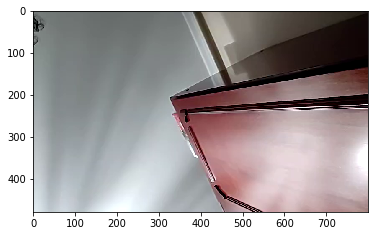

In [24]:
frameRGB2 = cv2.cvtColor(frame2, cv2.COLOR_RGB2BGR)
plt.imshow(frameRGB2)

In [104]:
cv2.__version__

'4.2.0-openvino'

In [105]:
sys.version_info

sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)

In [106]:
#print(cv2.getBuildInformation())

In [116]:
capt = cv2.VideoCapture("rtsp://192.168.1.45:8554/stream.amp", cv2.CAP_FFMPEG)
if not capt.isOpened():
    raise Exception("Could not open video stream")
for i in range(10):
    ret, frame2 = capt.read()
capt.release()
print ('done')

done


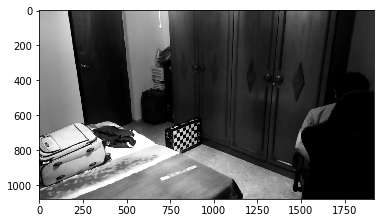

In [117]:
frameRGB2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
frameGray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
plt.imshow(frameGray2, cmap='gray', vmin=0, vmax=255)

In [118]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((5*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:5].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


In [119]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [120]:
ret, corners = cv2.findChessboardCorners(frameGray2, (7, 5), None)#7,5
#ret, corners = cv2.findChessboardCorners(frameGray2, (4,3), None)
ret

True

In [121]:
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

corners.shape


(35, 1, 2)

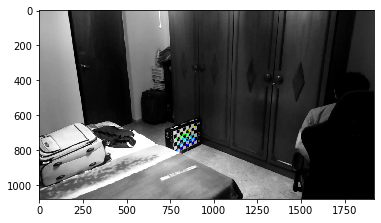

In [122]:
# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)#// careful coordinates in z ==0!!!
    
    corners2 = cv2.cornerSubPix(frameGray2, corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners)
    # Draw and display the corners
    frameOut = cv2.cvtColor(frameGray2, cv2.COLOR_GRAY2BGR)
    cv2.drawChessboardCorners(frameOut, (7,5), corners2, ret)
    plt.imshow(frameOut, cmap='gray', vmin=0, vmax=255)
    #cv.imshow('img', img)

In [123]:
#cv2.imshow('img', frameGray2)


#cv2.imshow("test", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
cv2.imwrite("./output.png", frameOut)

True

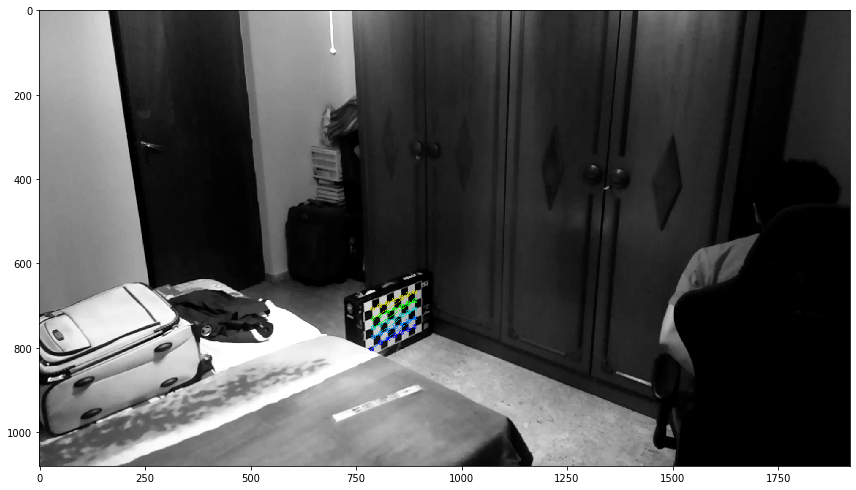

In [124]:
fig, ax = plt.subplots(figsize=(12, 8))
#ax.imshow(np.random.rand(8, 90), interpolation='nearest')
ax.imshow(frameOut, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()

In [125]:
frameGray2.shape

(1080, 1920)